In [1]:
import numpy as np
import scipy.io
import xarray as xr
import os
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo

from data_loading import get_altimetry_data, get_2021_CTD_data

In [2]:
get_altimetry_data([2013],[1])

<xarray.Dataset> Size: 77MB
Dimensions:    (time: 31, latitude: 128, nv: 2, longitude: 344)
Coordinates:
  * time       (time) datetime64[ns] 248B 2013-01-09 2013-01-27 ... 2013-01-12
  * latitude   (latitude) float32 512B 30.06 30.19 30.31 ... 45.69 45.81 45.94
  * longitude  (longitude) float32 1kB -5.938 -5.812 -5.688 ... 36.81 36.94
  * nv         (nv) int32 8B 0 1
Data variables:
    crs        (time) int32 124B -2147483647 -2147483647 ... -2147483647
    lat_bnds   (time, latitude, nv) float32 32kB 30.0 30.12 30.12 ... 45.88 46.0
    lon_bnds   (time, longitude, nv) float32 85kB -6.0 -5.875 ... 36.88 37.0
    err        (time, latitude, longitude) float64 11MB nan nan nan ... nan nan
    adt        (time, latitude, longitude) float64 11MB nan nan nan ... nan nan
    ugos       (time, latitude, longitude) float64 11MB nan nan nan ... nan nan
    vgos       (time, latitude, longitude) float64 11MB nan nan nan ... nan nan
    sla        (time, latitude, longitude) float64 11MB nan nan nan ... nan nan
    ugosa      (time, latitude, longitude) float64 11MB nan nan nan ... nan nan
    vgosa      (time, latitude, longitude) float64 11MB nan nan nan ... nan nan
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2013-01-09T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2013-01-09T00:00:00Z
    title:                           DT merged all satellites Mediterranean S...

In [23]:
ds = get_altimetry_data([2013],[1]).isel(time=0)

In [5]:
proj = ccrs.Mercator(central_longitude=4.5, min_latitude=38.0, max_latitude=45.0, latitude_true_scale=42.0)
set = [2, 10, 39, 46]

# Winter

In [3]:
winter_clim = get_altimetry_data([2013, 2014, 2015, 2016],[1,2,3], verbose=True).mean(dim='time')

Loading data from data/MOOSE-Altimetry/2013/01...
Loading data from data/MOOSE-Altimetry/2013/02...
Loading data from data/MOOSE-Altimetry/2013/03...
Loading data from data/MOOSE-Altimetry/2014/01...
Loading data from data/MOOSE-Altimetry/2014/02...
Loading data from data/MOOSE-Altimetry/2014/03...
Loading data from data/MOOSE-Altimetry/2015/01...
Loading data from data/MOOSE-Altimetry/2015/02...
Loading data from data/MOOSE-Altimetry/2015/03...
Loading data from data/MOOSE-Altimetry/2016/01...
Loading data from data/MOOSE-Altimetry/2016/02...
Loading data from data/MOOSE-Altimetry/2016/03...
Done!


In [40]:
wintvnew = winter_clim['vgos'] * np.cos( winter_clim.latitude / 180 * np.pi)
Norm = np.sqrt(winter_clim['ugos']**2+ winter_clim['vgos']**2) / np.sqrt(winter_clim['ugos']**2 + wintvnew**2)

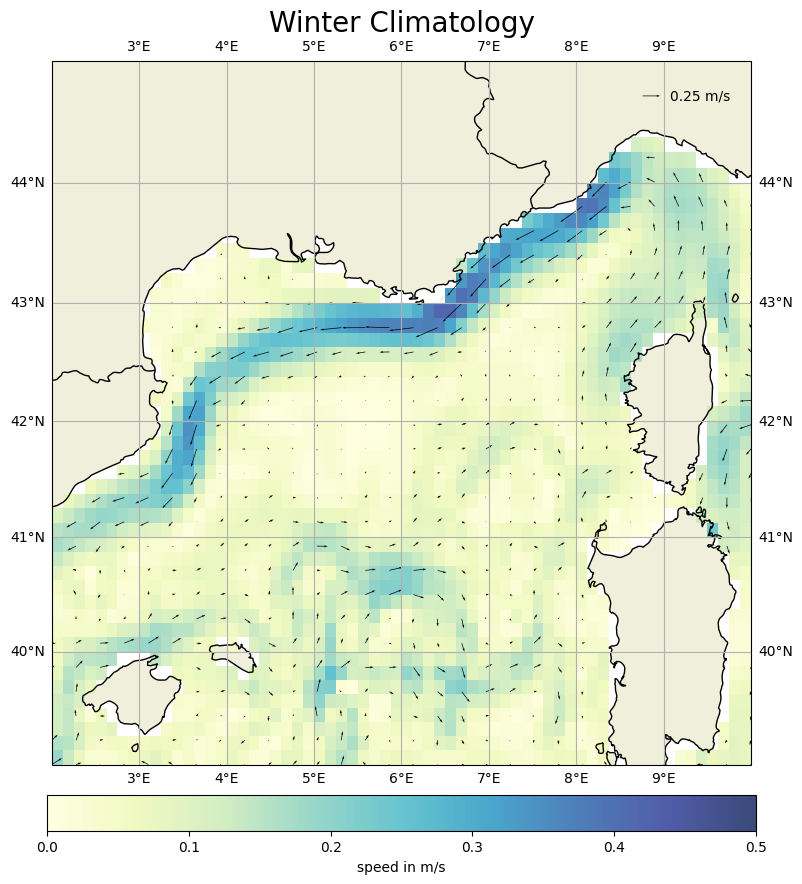

In [52]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent(set)

pc = ax.pcolormesh(
    winter_clim.longitude, 
    winter_clim.latitude, 
    np.sqrt(winter_clim['ugos']**2 + winter_clim['vgos']**2), 
    transform=ccrs.PlateCarree(), 
    cmap='YlGnBu',
    alpha=0.8,
    vmax = 0.5,
    vmin=0
)
#pc = ax.pcolormesh(ds_mean.longitude, ds_mean.latitude,ds_mean['ugos'], transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.5)
q = ax.quiver(
    winter_clim.longitude, 
    winter_clim.latitude, 
    winter_clim['ugos']*Norm, 
    wintvnew*Norm, 
    transform=ccrs.PlateCarree(), 
    regrid_shape=30,
    scale=10,
    width=0.001
)
ax.quiverkey(q, X=0.87, Y=0.95, U=0.25, label='0.25 m/s', labelpos='E', transform=ax.transAxes)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)
plt.colorbar(pc, orientation='horizontal', label='speed in m/s', fraction=0.046, pad=0.04)
plt.title('Winter Climatology', fontsize=20)
plt.savefig('winter')
plt.show()


# Summer

In [11]:
summer_clim = get_altimetry_data([2013, 2014, 2015, 2016],[7,8,9]).mean(dim='time')

In [42]:
sumnew = summer_clim['vgos'] * np.cos( summer_clim.latitude / 180 * np.pi)
Norm1 = np.sqrt(summer_clim['ugos']**2+ summer_clim['vgos']**2) / np.sqrt(summer_clim['ugos']**2 + sumnew**2)

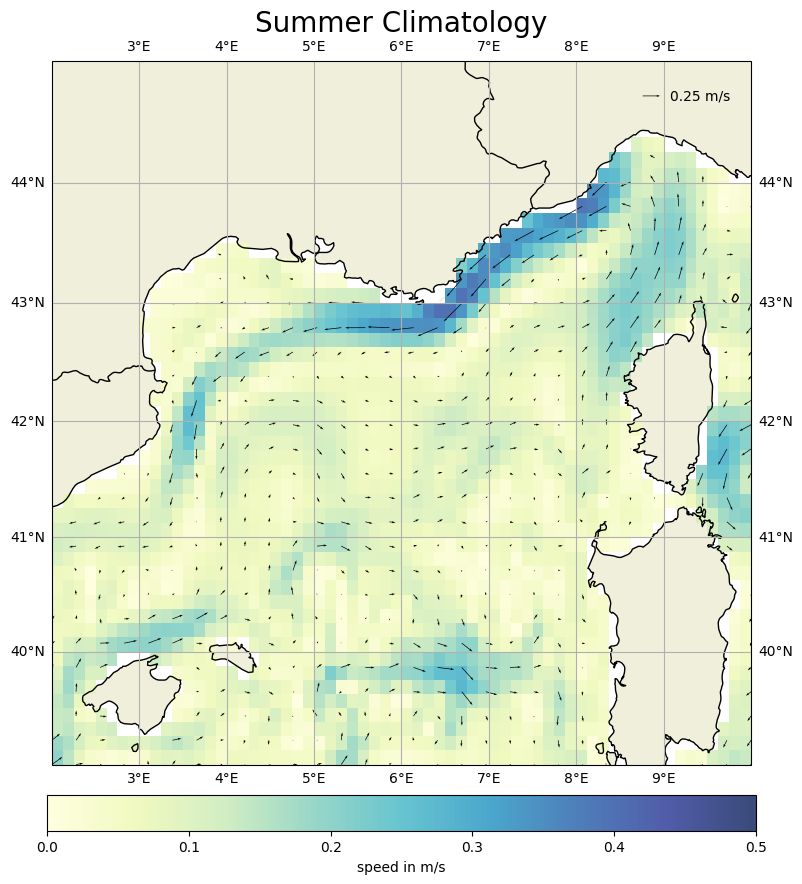

In [53]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent(set)

pc = ax.pcolormesh(
    summer_clim.longitude, 
    summer_clim.latitude, 
    np.sqrt(summer_clim['ugos']**2 + summer_clim['vgos']**2), 
    transform=ccrs.PlateCarree(), 
    cmap='YlGnBu',
    alpha=0.8,
    vmax = 0.5,
    vmin=0
)
#pc = ax.pcolormesh(ds_mean.longitude, ds_mean.latitude,ds_mean['ugos'], transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.5)
q = ax.quiver(
    summer_clim.longitude, 
    summer_clim.latitude, 
    summer_clim['ugos']*Norm1, 
    sumnew*Norm1, 
    transform=ccrs.PlateCarree(), 
    regrid_shape=30,
    scale=10,
    width=0.001
)
ax.quiverkey(q, X=0.87, Y=0.95, U=0.25, label='0.25 m/s', labelpos='E', transform=ax.transAxes)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)
plt.colorbar(pc, orientation='horizontal', label='speed in m/s', fraction=0.046, pad=0.04)
plt.title('Summer Climatology', fontsize=20)
plt.savefig('Summer')
plt.show()

# Comparaison 

In [37]:
diff = summer_clim - winter_clim
diffnew = diff['vgos'] * np.cos( diff.latitude / 180 * np.pi)
Norm2 = np.sqrt(diff['ugos']**2+ diff['vgos']**2) / np.sqrt(diff['ugos']**2 + diffnew**2)

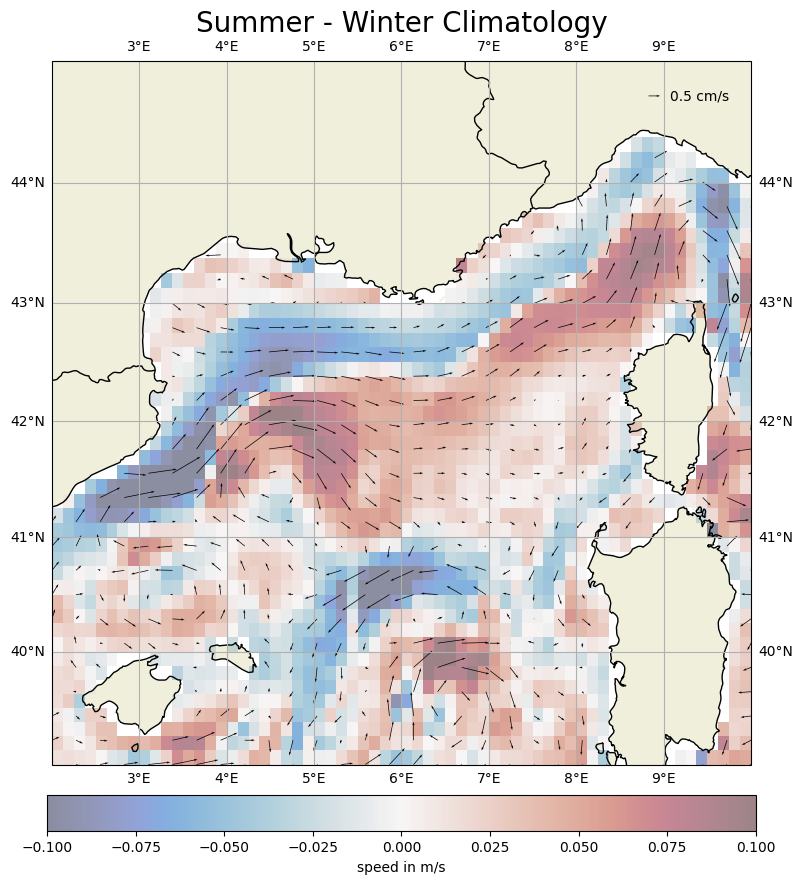

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent(set)
step = 2
pc = ax.pcolormesh(
    diff.longitude, 
    diff.latitude, 
    np.sqrt(summer_clim['ugos']**2 + summer_clim['vgos']**2) - np.sqrt(winter_clim['ugos']**2 + winter_clim['vgos']**2),
    transform=ccrs.PlateCarree(), 
    cmap=cmo.balance, 
    alpha=0.5,
    vmin=-0.1,
    vmax=0.1
)
#pc = ax.pcolormesh(ds_mean.longitude, ds_mean.latitude,ds_mean['ugos'], transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.5)
q = ax.quiver(
    diff.longitude, 
    diff.latitude, 
    diff['ugos']*Norm2, 
    diffnew*Norm2, 
    transform=ccrs.PlateCarree(), 
    regrid_shape=30,
    scale=3,
    width=0.001
)
ax.quiverkey(q, X=0.87, Y=0.95, U=0.05, label='0.5 cm/s', labelpos='E', transform=ax.transAxes)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)
plt.colorbar(pc, orientation='horizontal', label='speed in m/s', fraction=0.046, pad=0.04)
plt.title('Summer - Winter Climatology', fontsize=20)
plt.savefig('Summer_winter')
plt.show()

# Other

In [8]:
g = 9.81
omega = 2 * np.pi / (24*3600) 
print('omega =', omega)
R = 6.371e6

x = (ds.longitude -  ds.longitude.mean()) * R * np.cos(np.deg2rad(ds.latitude.mean())) / 360 * 2 * np.pi
y = (ds.latitude - ds.latitude.mean())* R / 360 * 2 * np.pi
f = float(2*omega*np.sin(np.deg2rad(ds.latitude.mean())))

print('f =', float(f))

h = ds['adt'].values.T # (x, y)
h.shape, x.shape, y.shape

# Compute the gradient of h
dhdx, dhdy = np.gradient(h, x, y, axis=(0, 1))
u = -g/f * dhdy
v = g/f * dhdx

print(u.shape, v.shape)

ds['u_calc'] = xr.DataArray(
    u.T, 
    dims=['latitude', 'longitude'], 
)
ds['v_calc'] = xr.DataArray(
    v.T, 
    dims=['latitude', 'longitude'], 
)

omega = 7.27220521664304e-05
f = 8.954433571380923e-05
(344, 128) (344, 128)


In [10]:
mean_diff = np.abs((winter_clim['u_calc'] - winter_clim['ugos'])).mean()
print(mean_diff)

fig, axs = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': proj})

# First subplot
ax = axs[0]
ax.set_extent([-1, 10, 38, 45])
pc = ax.pcolormesh(
    ds.longitude, 
    ds.latitude, 
    ds['u_calc'].values,
    transform=ccrs.PlateCarree(), 
    cmap=cmo.balance,
    alpha=0.8,
    vmin=-0.6,
    vmax=0.6,
)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)
fig.colorbar(pc, ax=ax, orientation='horizontal', label='u [m/s]')
ax.set_title('Our computation')

# Second subplot
ax = axs[1]
ax.set_extent(set)
pc = ax.pcolormesh(
    ds.longitude, 
    ds.latitude, 
    ds['ugos'],
    transform=ccrs.PlateCarree(), 
    cmap=cmo.balance,
    alpha=0.8,
    vmin=-0.6,
    vmax=0.6,
)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)
fig.colorbar(pc, ax=ax, orientation='horizontal', label='u [m/s]')
ax.set_title('Already computed')

# Third subplot
ax = axs[2]
ax.set_extent(set)
pc = ax.pcolormesh(
    ds.longitude, 
    ds.latitude, 
    ds['ugos'] - ds['u_calc'],
    transform=ccrs.PlateCarree(), 
    cmap=cmo.balance,
    alpha=0.8,
    vmin=-0.6,
    vmax=0.6,
)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)
fig.colorbar(pc, ax=ax, orientation='horizontal', label='u [m/s]')
ax.set_title('Difference')

plt.tight_layout()
plt.show()


KeyError: "No variable named 'u_calc'. Variables on the dataset include ['crs', 'lat_bnds', 'lon_bnds', 'err', 'adt', ..., 'ugosa', 'vgosa', 'latitude', 'longitude', 'nv']"

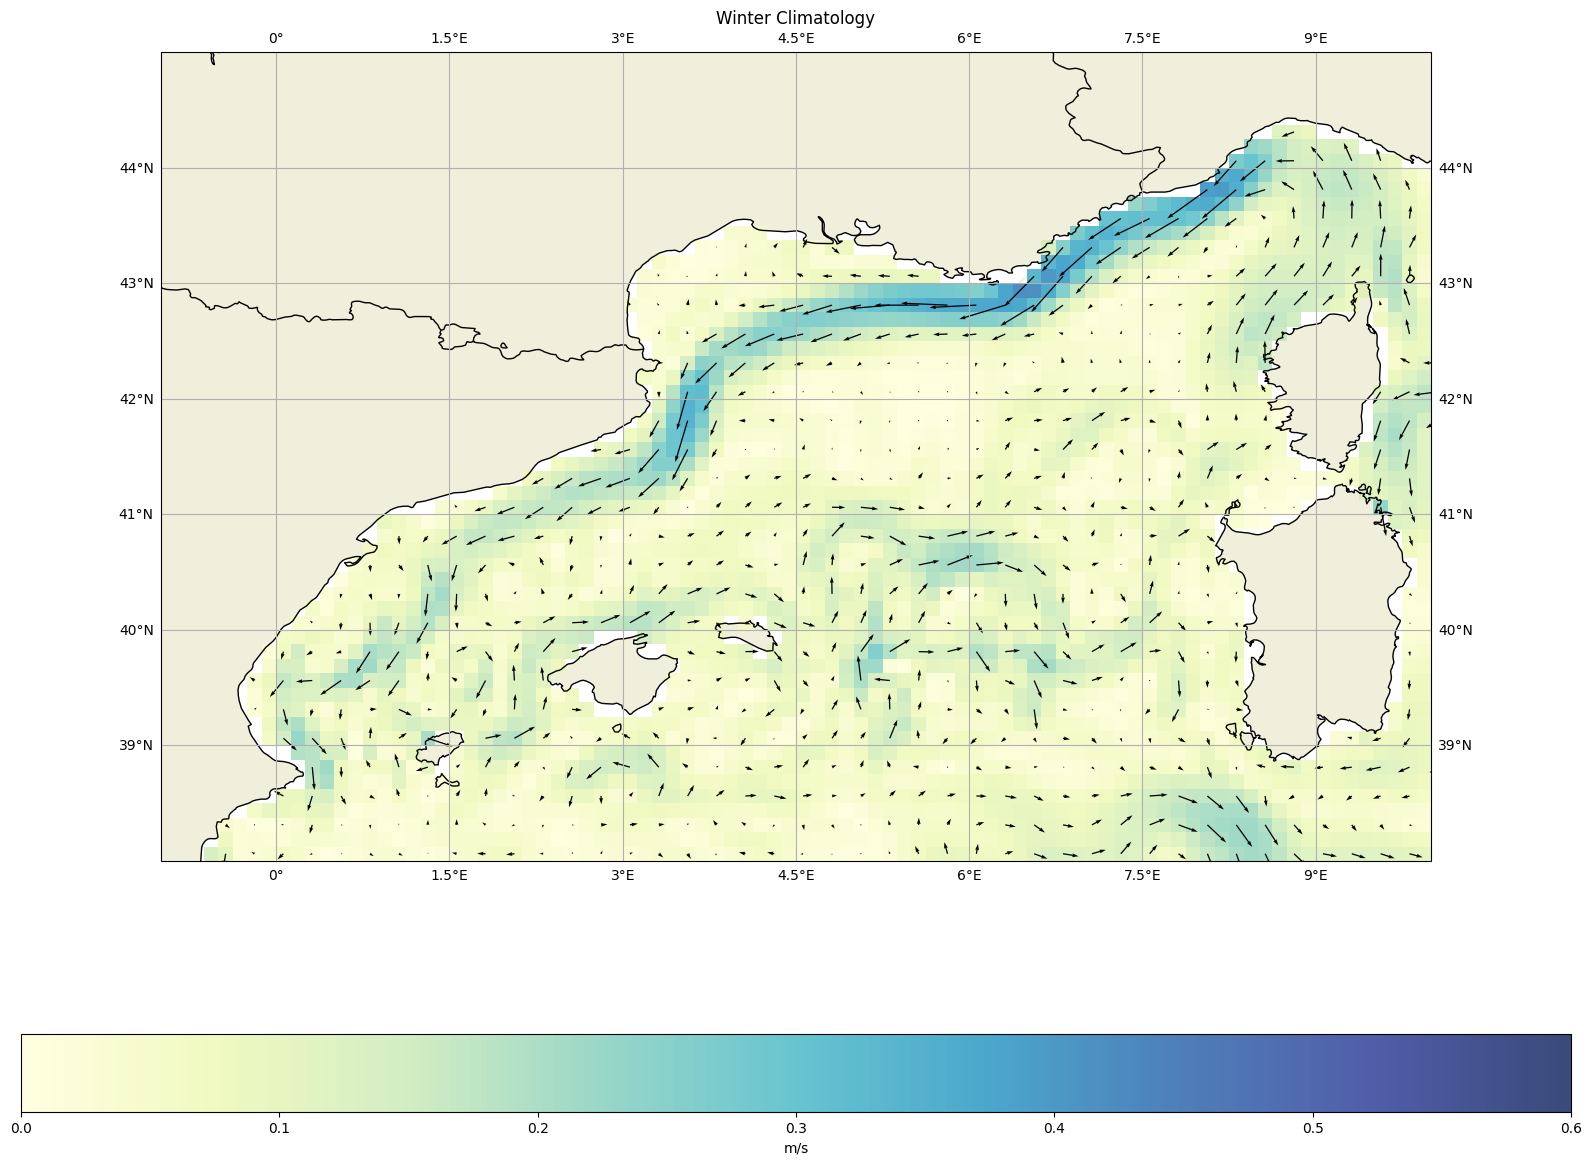

In [13]:
plt.figure(figsize=(20,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(set)
step = 2
pc = ax.pcolormesh(
    winter_clim.longitude, 
    winter_clim.latitude, 
    np.sqrt(winter_clim['ugos']**2 + winter_clim['vgos']**2), 
    transform=ccrs.PlateCarree(), 
    cmap='YlGnBu',
    alpha=0.8,
    vmax = 0.6,
    vmin=0
)
#pc = ax.pcolormesh(ds_mean.longitude, ds_mean.latitude,ds_mean['ugos'], transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.5)
ax.quiver(
    winter_clim.longitude[::step], 
    winter_clim.latitude[::step], 
    winter_clim['ugos'][::step, ::step], 
    winter_clim['vgos'][::step, ::step], 
    transform=ccrs.PlateCarree(), 
    scale=10,
    width=0.001
)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.gridlines(draw_labels=True)
plt.colorbar(pc, orientation='horizontal', label='m/s')
plt.title('Winter Climatology')
plt.show()
